In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data
path = "../data/"
files = [
    path + "180601_Customer_Info.csv",
    path + "180601_Referrals_Info.csv"
]
dfs = [pd.read_csv(file) for file in files]
df_customer, df_referrals = dfs[0], dfs[1]
# change date to datetime format
df_referrals["referral_date"] = pd.to_datetime(df_referrals["referral_date"])
# change date to datetime format
df_customer["sign_up_date"] = pd.to_datetime(df_customer["sign_up_date"])
# remove duplicate (see data exploration for details)
df_customer = df_customer[df_customer.index != 1380]
# merge both tables
df_all = df_referrals.merge(right=df_customer, how="left", left_on="referrer_customer_id", right_on="customer_id")\
.drop(columns="customer_id").rename(columns={
    "sign_up_date" : "referrer_sign_up_date",
    "sign_up_channel" : "referrer_sign_up_channel"
})
# add duration
df_all["duration_before_referal"] = df_all["referral_date"] - df_all["referrer_sign_up_date"]
df_all["days_before_referal"] = df_all["duration_before_referal"].dt.days
# add a few more info
df_all["referral_month"] = df_all["referral_date"].dt.month
df_all["referral_day"] = df_all["referral_date"].dt.day
df_all["referral_dayofweek"] = df_all["referral_date"].dt.dayofweek

In [4]:
# top 10 referrers
df_referrals_count = df_referrals.groupby(by="referrer_customer_id", as_index=False).count().drop(columns="sign_up_customer_id")\
.rename(columns={"referral_date" : "count"}).sort_values("count", ascending=False)

top10_ids = df_referrals_count.head(10)["referrer_customer_id"].to_list()

def is_top10(id):
    return id in top10_ids

df_top = df_all[df_all["referrer_customer_id"].apply(is_top10)]

## Let's invite our members to refer their friends
#### - to the people not coming from referal, immediately after they sign up
#### - to all members who didn't refer a friend yet after 90 days

## Most people refer their friends as soon as they sign up, but not all

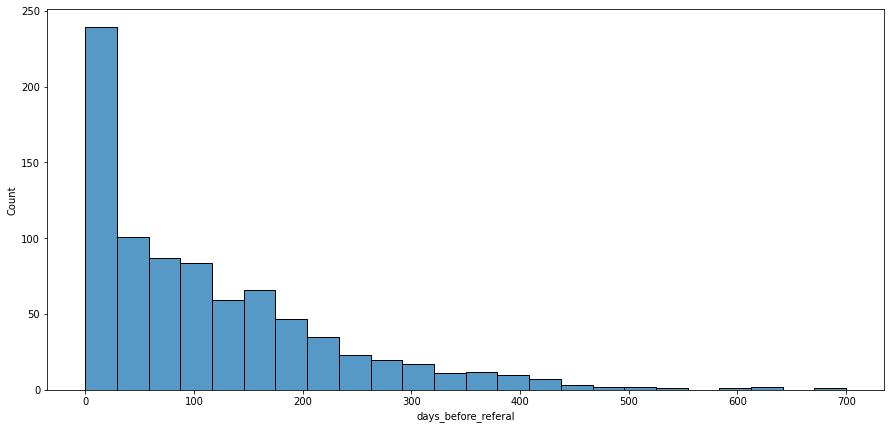

In [26]:
plt.figure(figsize=(15,7))
sns.histplot(data=df_all, x="days_before_referal");

## July 2021 was a special month

#### Was there special circumstances on July 2021, like a referal campain?

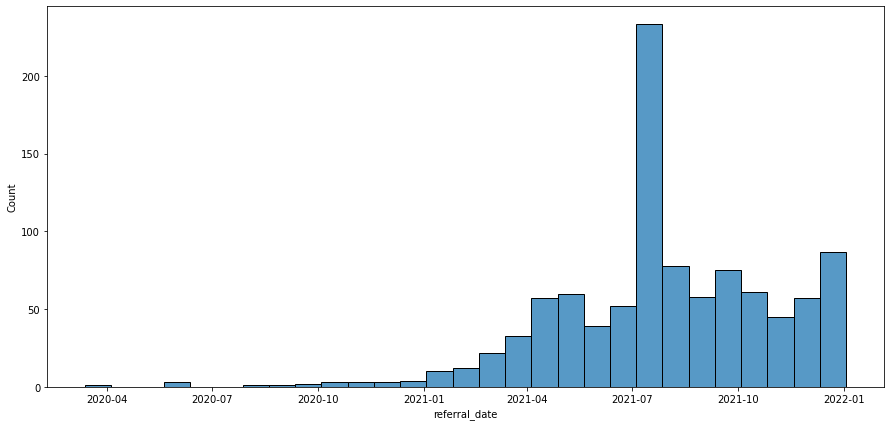

In [27]:
plt.figure(figsize=(15,7))
sns.histplot(data=df_all, x="referral_date");

## People are ready to refer a friend any day

#### Maybe even more on Saturdays

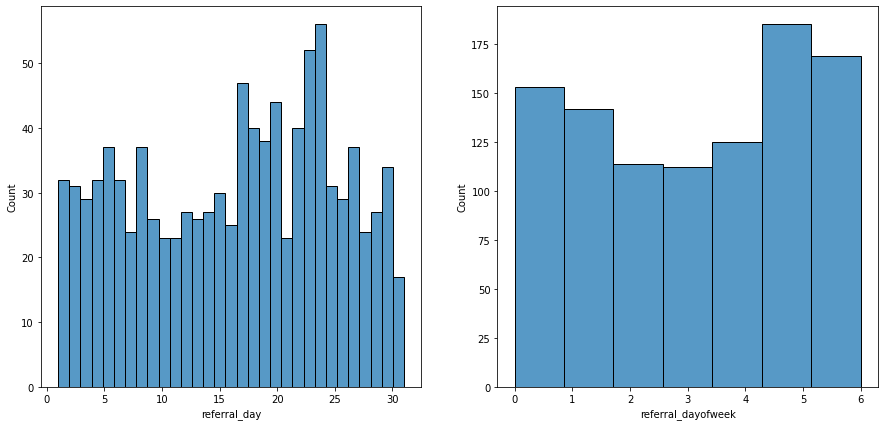

In [35]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
sns.histplot(data=df_all, x="referral_day", bins=31);
plt.subplot(1, 2, 2)
sns.histplot(data=df_all, x="referral_dayofweek", bins=7);

## Some of our top 10 referrers didn't start immediately

#### Note that customer #8 alone referred 34 people

In [20]:
df_top["referrer_customer_id_s"] = df_top["referrer_customer_id"].apply(str)

/home/geoffroy/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [22]:
df_top_min = df_top.groupby(by="referrer_customer_id_s", as_index=False).min()[["referrer_customer_id_s", "days_before_referal"]]

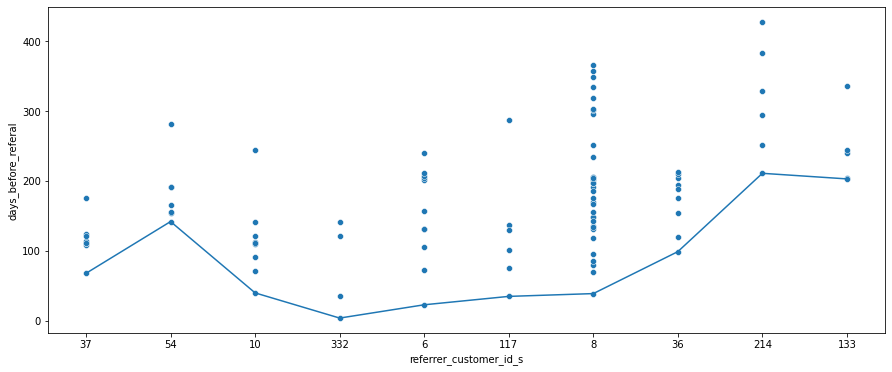

In [31]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df_top, x="referrer_customer_id_s", y="days_before_referal");
sns.lineplot(data=df_top_min, x="referrer_customer_id_s", y="days_before_referal");

## People not comming from referal take more time to refer

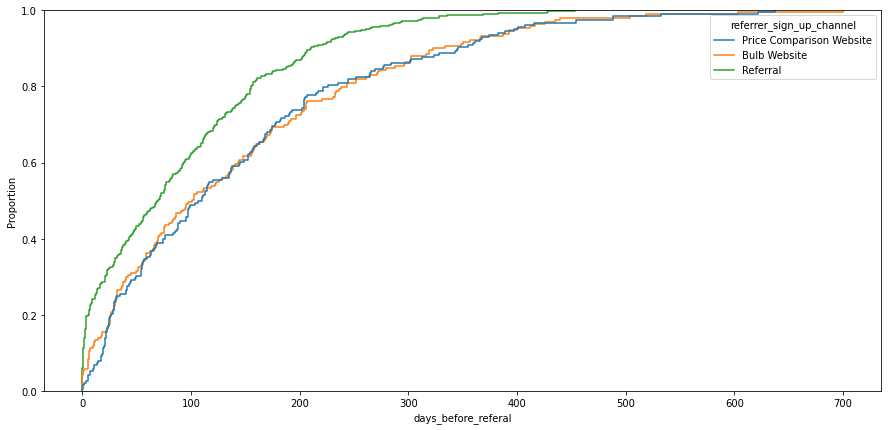

In [30]:
plt.figure(figsize=(15,7))
sns.ecdfplot(data=df_all, x="days_before_referal", hue="referrer_sign_up_channel");

## Let's send emails

### Let's invite our members to refer their friends
#### - to the people not coming from referal, immediately after they sign up
#### - to all members who didn't refer a friend yet after 90 days